In [1]:
import tensorflow as tf

In [2]:
print("Tensorflow version: {}".format(tf.__version__))

Tensorflow version: 2.11.0


当没有为输入模式的时候，点击"l"，会出现类似这个有编号的样子
点击"f"会进入查找替换

In [3]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

第一个是个数，后面的是形状

In [6]:
train_images.shape

(60000, 28, 28)

函数api的核心思想就是可以调用

首先建立一个输入

函数式api的好处是可以建立一个多输入多输出的模型

In [7]:
input = keras.Input(shape=(28, 28))

把keras.;ayers.Flatten()看作一个函数，然后输入时input

In [8]:
x = keras.layers.Flatten()(input)

keras.layers.Dense(32, activation='relu')是建立的dense层，直接用这个调用x，这就是函数apid的关键点，就是将每个层当成一个函数调用

In [9]:
x = keras.layers.Dense(32, activation='relu')(x)

In [10]:
x = keras.layers.Dropout(0.5)(x)

In [11]:
x = keras.layers.Dense(64, activation='relu')(x)

In [12]:
output = keras.layers.Dense(10, activation = 'softmax')(x)

这样input和output之间正好建立了这个网络，告诉这个模型，它的输入时input，输出时output，这样就会根据输入和输出来初始化好这个模型

In [13]:
model = keras.Model(inputs = input, outputs = output)

[(None, 28, 28)] 中None代表个数，可以是任意个。

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 27,882
Trainable params: 27,882
Non-trainable p

In [15]:
model.compile(optimizer = 'adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )

In [17]:
history = model.fit(train_images, 
                    train_labels,
                    epochs = 30,
                    validation_data = (test_images, test_labels))

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8212 - accuracy: 0.6959 - val_loss: 0.5277 - val_accuracy: 0.8079
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6164 - accuracy: 0.7743 - val_loss: 0.5275 - val_accuracy: 0.7992
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5779 - accuracy: 0.7890 - val_loss: 0.5870 - val_accuracy: 0.7522
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5592 - accuracy: 0.7956 - val_loss: 0.5583 - val_accuracy: 0.7826
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5373 - accuracy: 0.8031 - val_loss: 0.6202 - val_accuracy: 0.7513
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5273 - accuracy: 0.8080 - val_loss: 0.5847 - val_accuracy: 0.7664
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5172 - accuracy: 0.8095 - val_loss: 0.5170 - val_accuracy:

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

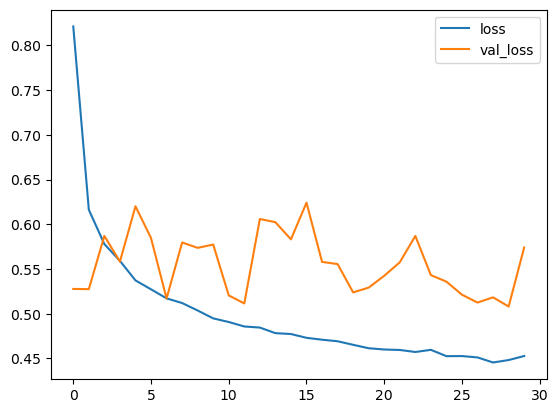

In [19]:
plt.plot(history.epoch, history.history.get('loss'), label = 'loss')
plt.plot(history.epoch, history.history.get('val_loss'), label = 'val_loss')
plt.legend()

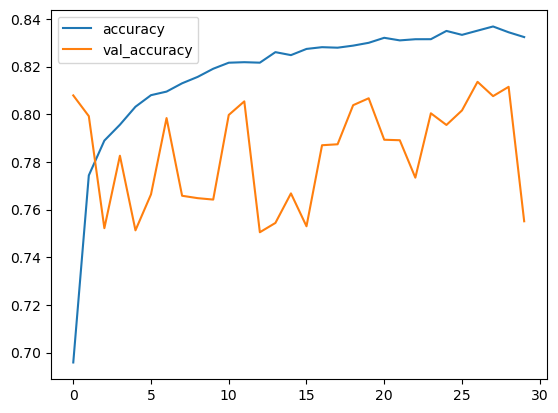

In [21]:
plt.plot(history.epoch, history.history.get('accuracy'), label='accuracy')
plt.plot(history.epoch, history.history.get('val_accuracy'), label='val_accuracy')
plt.legend()

# 多输入

In [33]:
input1 = keras.Input(shape=(28, 28))

In [34]:
input2 = keras.Input(shape=(28, 28))

In [35]:
x1 = keras.layers.Flatten()(input1)
x2 = keras.layers.Flatten()(input2)

将x1和x2合并在一起

In [36]:
x = keras.layers.concatenate([x1, x2])

In [37]:
x = keras.layers.Dense(32, activation='relu')(x)

In [38]:
output = keras.layers.Dense(1, activation = 'sigmoid')(x)

In [39]:
model = keras.Model(inputs = [input1, input2], outputs = output)

In [40]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_5 (Flatten)            (None, 784)          0           ['input_6[0][0]']                
                                                                                                  
 flatten_6 (Flatten)            (None, 784)          0           ['input_7[0][0]']                
                                                                                            